In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
%matplotlib inline

In [2]:
T         = 100    # total time to sumulate (msec)
dt        = 0.25 # Simulation timestep
time      = np.arange(0,T,dt)

In [3]:
## Stimulus 1
I1 = np.array([2 if 10<=t<=75 else 0 for t in time])
I2 = np.array([1.5 for t in time])
I3 = 5*np.sin(m.pi/4*time)
I4 = -2*np.sin(m.pi/4 * time) + 3*np.sin(m.pi/3*time) + np.cos(m.pi/6*time)


In [4]:
def simulate(I, plot=True):
    ## LIF properties
    Vm      = np.zeros(len(time))    # potential (V) trace over time
    Rm      = 2                   # resistance (kOhm)
    Cm      = 5                  # capacitance (uF)
    tau_m   = Rm*Cm               # time constant (msec)
    tau_ref = 5                   # refractory period (msec)
    Vth     = 1                   # spike threshold (V)
    t_rest = 0
    count = 0
    ## iterate over each time step
    for i, t in enumerate(time): 
        if t > t_rest:                  
            Vm[i] = Vm[i-1] + (-Vm[i-1] + I[i-1]*Rm) / tau_m * dt     #Euler method        


        if Vm[i] >= Vth:
            t_rest = t + tau_ref
            count+=1
    if plot:
        fig = plt.figure("Leaky Integrate and Fire Simulation", figsize=(14, 7))
        ax = fig.add_subplot(111)
        plt.title("Leaky Integrate and Fire Neuron Simulation")
        fig.subplots_adjust(left=0.1, bottom=0.32)
        line = plt.plot(time, Vm, label="Potential")[0]
        line2 = plt.plot(time, I, label="Applied Current")[0]
        plt.legend(loc="upper right")
        plt.ylabel("Potential [V]/ Current [A]")
        plt.xlabel("Time [s]")
        plt.show()
    return count*10

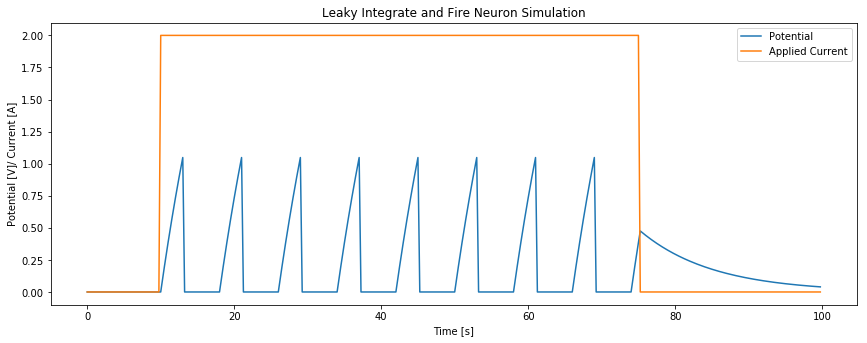

80

In [5]:
simulate(I1)

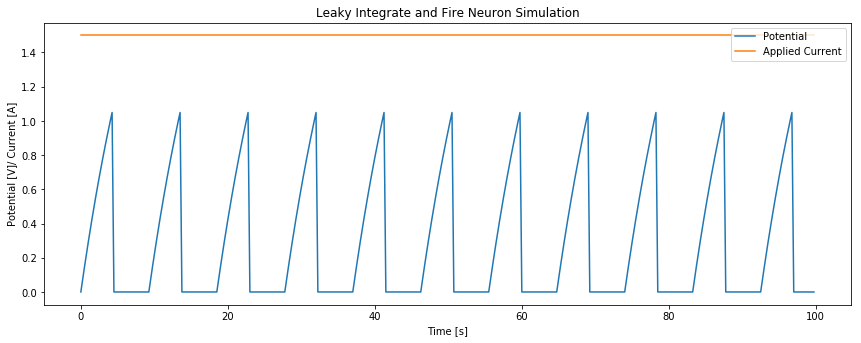

110

In [6]:
simulate(I2)

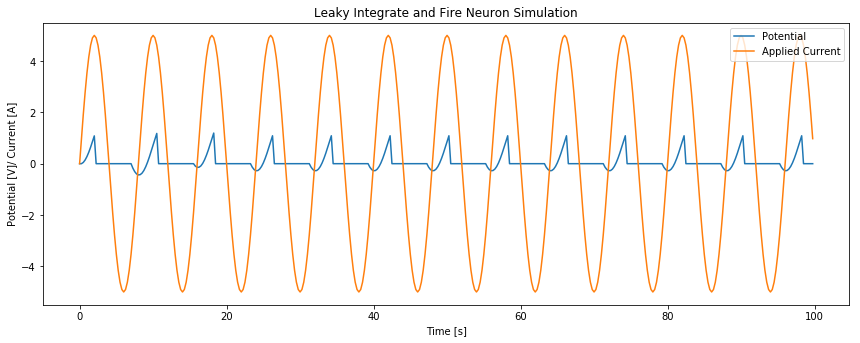

130

In [7]:
simulate(I3)

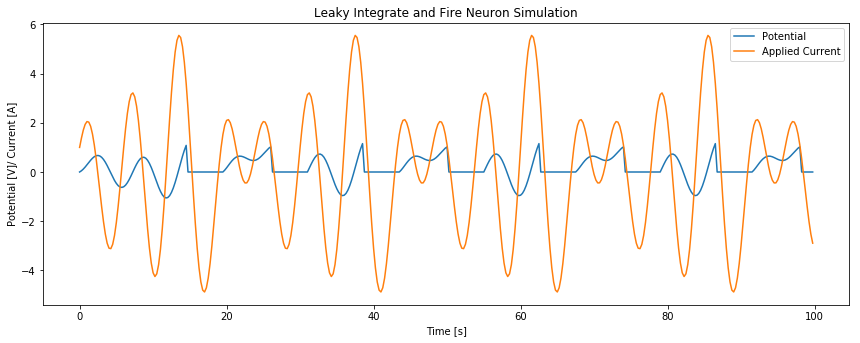

80

In [8]:
simulate(I4)

1000


Text(0.5, 1.0, 'Current vs nu_firing')

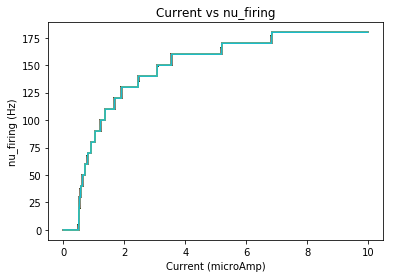

In [9]:
I = np.arange(0,10,0.01).reshape(1000,1)
I = I*np.ones((1000,400))
nu_firing = np.array([simulate(curr, False) for curr in I])

plt.plot(I, nu_firing)
plt.xlabel("Current (microAmp)")
plt.ylabel("nu_firing (Hz)")
plt.title("Current vs nu_firing")